In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
     num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data),len(test_data)

(8982, 2246)

In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
train_labels[10]

3

In [5]:
# keras를 이용한 방법
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

[과제]
-모델 구성
-model compile
-훈련 검증 : 1000개 샘플을 검증 세트로 사용
-학습:epochs=20, batch_size=512
-훈련과정 시각화
-적합한 epoch 확인

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 61ms/step - loss: 2.7653 - acc: 0.4578 - val_loss: 1.8184 - val_acc: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4567 - acc: 0.7046 - val_loss: 1.2941 - val_acc: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 1.0531 - acc: 0.7801 - val_loss: 1.1199 - val_acc: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8303 - acc: 0.8280 - val_loss: 1.0213 - val_acc: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6603 - acc: 0.8657 - val_loss: 0.9580 - val_acc: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5301 - acc: 0.8925 - val_loss: 0.9408 - val_acc: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4257 - acc: 0.9107 - val_loss: 0.8932 - val_acc: 0.8070
Epoch 8/20
16/16 [==============================] - 1s 50ms/step - loss: 0.3526 - a

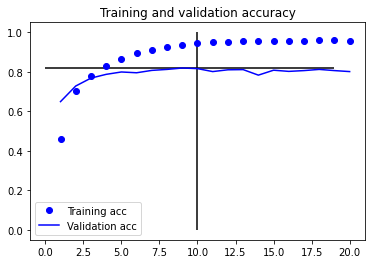

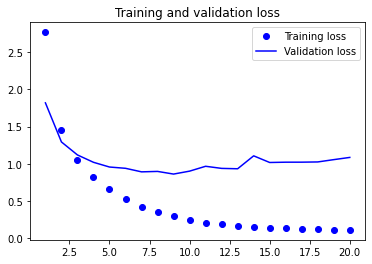

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.hlines(0.82,0,19)
plt.vlines(10,0,1)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()